# Postwork 8

 ## Nombre del Postwork: Procesamiento de Lenguaje Natural

### OBJETIVO 

- Aplicar los conceptos de Procesamiento de Lenguaje Natural aprendidos en esta sesión a nuestro proyecto

#### REQUISITOS 

- Tener un dataset limpio que contenga una columna con datos no estructurados.

> En caso de que tu dataset no contenga datos no estructurados, date una vuelta por [Kaggle](https://kaggle.com) y busca algún dataset apropiado. Lo que nos interesa en que practiques estas herramientas durante la clase para que puedas expresarle tus dudas a la experta.

#### DESARROLLO

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

1. Utiliza patrones Regex para limpiar tus datos estructurados
2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método `similar` para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

¡Mucha suerte!

In [99]:
!pip install WordCloud

     |████████████████████████████████| 366 kB 24.1 MB/s 


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('punkt');
nltk.download('stopwords');


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Sesion-07/Top 500 Songs.csv')
df.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,""�...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads�(ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine�(Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On�(Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye�,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You�(Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


In [4]:
grouped_by_title = df.groupby('title')['description'].last()
grouped_by_title[3]

'Haley began his career as a country yodeler before converting to rock & roll. "Clock" was a modest hit until it played during the opening credits of The Blackboard Jungle and shot to Number One.'

In [5]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = df.dropna()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')  
grouped_by_title = grouped_by_title.str.replace('\d|\\n', '')
#grouped_by_title = grouped_by_title.str.replace('\d', '')
#grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


title
(Dont Fear) the Reaper                            this long island bands death trip was picked b...
(I Can't Get No) Satisfaction'                    its the riff heard round the world says steve ...
(Sittin' on) the Dock of the Bay                  a few days after his starmaking set at the mon...
(Were Gonna) Rock Around the Clock                haley began his career as a country yodeler be...
(Your Love Keeps Lifting Me) Higher and Higher    at first he sang it like a ballad but wilson h...
                                                                        ...                        
You Keep Me Hanging On                            the stuttering guitar sounds like an sos and t...
You Really Got Me                                 convinced that the bands previous two singles ...
You've Lost That Lovin' Feelin''                  spectorwas conducting the musicians for aronet...
Young Americans                                   in  bowie traded his glammedout ziggy stardu

In [6]:
grouped_by_title[3]

'haley began his career as a country yodeler before converting to rock  roll clock was a modest hit until it played during the opening credits of the blackboard jungle and shot to number one'

In [7]:
tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [8]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

In [9]:
text.concordance('world', lines=20)

Displaying 15 of 15 matches:
ternity its the riff heard round the world says steve van zandt guitarist for t
 england on the six hour tv show our world a satellite broadcast seen by millio
e message they wanted to send to the world it was for love and bloody peace rin
 like a gunshot reeves reinvents the world as a giant block party franklin disa
s also the song in which he told the world like it or not rock roll is here to 
ine his greatest musical gift to the world one morning early in in his bedroom 
ite grand piano now known around the world from films and photographs of the se
 plainspoken faith in the power of a world united in purpose to repair and chan
s saying that his room was his whole world said usher who wrote the lyrics base
bel owner george goldner but now the world knows better maybe im amazed first a
ram frustrated with the state of the world told house songwriter rice that blac
he first take unheard of in spectors world bennett and spector were married two
 classicalr

In [10]:
text.similar('hate',num=30)

In [11]:
text.similar('love',num=30)

rock it drug day degree cynicism on houseboat california producer new
real suggested soul mccartney bed piano session summer pepsi show us
drummer did people her studio elvis sound version


In [12]:
text.similar('drug',num=30)


rock love cynicism california producer new bed summer pepsi elvis
sound debt seven campaign perfect plastic alias tuttifrutti arranging
hurt brandnew


In [33]:
text.common_contexts(['love', 'man'])

a_in


In [14]:
len(set(text))

5178

In [15]:
len(text)

24319

In [16]:
text.collocations()

number one; rolling stone; new york; rock roll; told rolling; muscle
shoals; san francisco; high school; years later; los angeles; beach
boys; hound dog; million copies; biggest hit; new jersey; backing
vocals; bass line; purple haze; ringo starr; whole lotta


3 .

In [17]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(20)

[('the', 1587),
 ('a', 714),
 ('to', 510),
 ('of', 509),
 ('and', 482),
 ('in', 469),
 ('was', 395),
 ('it', 346),
 ('on', 281),
 ('for', 254),
 ('he', 244),
 ('song', 241),
 ('his', 233),
 ('with', 221),
 ('that', 196),
 ('said', 196),
 ('i', 181),
 ('by', 142),
 ('but', 142),
 ('this', 140)]

In [18]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [19]:
freq_dist_no_stop_words.most_common(50)

[('song', 241),
 ('said', 196),
 ('one', 111),
 ('first', 102),
 ('hit', 84),
 ('wrote', 73),
 ('new', 66),
 ('like', 61),
 ('single', 53),
 ('band', 52),
 ('guitar', 52),
 ('recorded', 48),
 ('record', 48),
 ('got', 46),
 ('later', 45),
 ('number', 44),
 ('came', 44),
 ('songs', 44),
 ('lyrics', 43),
 ('rock', 42),
 ('became', 41),
 ('love', 40),
 ('time', 37),
 ('would', 36),
 ('cut', 36),
 ('called', 36),
 ('studio', 36),
 ('version', 36),
 ('told', 34),
 ('top', 33),
 ('made', 32),
 ('track', 32),
 ('years', 32),
 ('played', 31),
 ('pop', 30),
 ('album', 30),
 ('written', 30),
 ('inspired', 29),
 ('went', 29),
 ('heard', 28),
 ('music', 28),
 ('singer', 28),
 ('recording', 28),
 ('group', 28),
 ('around', 28),
 ('riff', 27),
 ('ballad', 27),
 ('didnt', 27),
 ('lennon', 27),
 ('rolling', 26)]

In [35]:
print(f'{(100 * freq_dist_no_stop_words["said"] / len(all_words_except_stop_words)):.3f}%')



1.384%


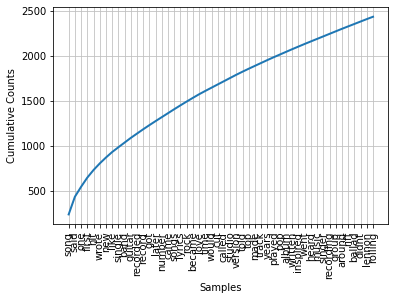

In [21]:
freq_dist_no_stop_words.plot(50, cumulative=True);


In [22]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['island',
 'ghostly',
 'cowbell',
 'reaper',
 'chills',
 'halloween',
 'bonus',
 'points',
 'crackpot',
 'theology',
 'romeo',
 'juliet',
 'eternity',
 'round',
 'zandt',
 'examples',
 'ofdylaninfluencing',
 'andthe',
 'tradition',
 'starmaking']

4 .

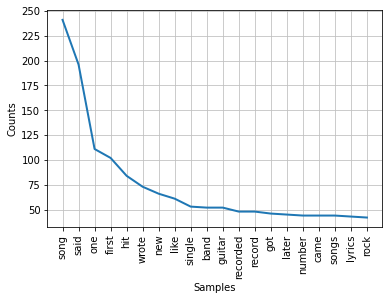

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [95]:
freq_dist_no_stop_words.plot(20)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


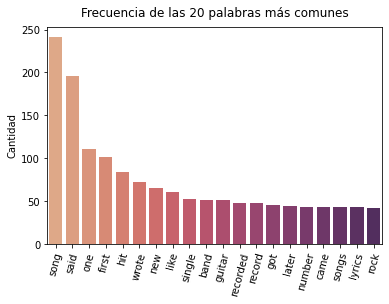

In [23]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

# conversión a tipo númerico
most_common_20_cant = []
for i,j in most_common_20:
    most_common_20_cant.append(int(j))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20_cant, ax=ax, palette='flare');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Cantidad')
ax.tick_params(axis='x', rotation=75)

5 .

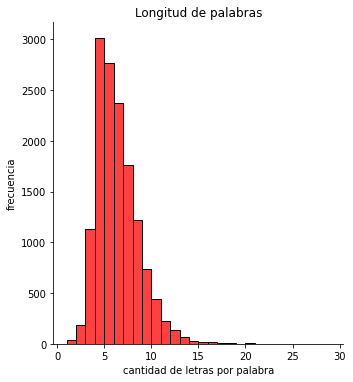

In [92]:
len_words = [len(n) for n in all_words_except_stop_words]

sns.displot(len_words, binwidth=1,kde=False, color='r')
plt.title('Longitud de palabras');
plt.xlabel('cantidad de letras por palabra');
plt.ylabel('frecuencia');

6 .

(-0.5, 399.5, 199.5, -0.5)

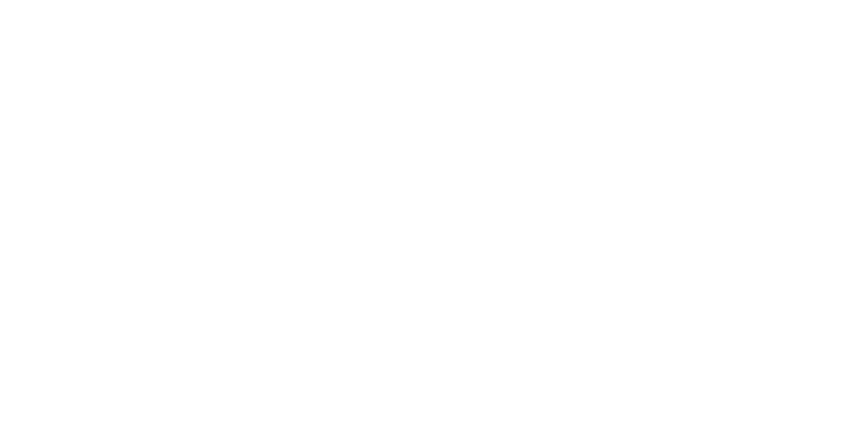

In [101]:
#most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

wordcloud = WordCloud(max_font_size=100,background_color='white').generate(''.join(all_words_except_stop_words))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>